Kaynak: [Book-Crossing: Starter notebook and EDA](https://www.kaggle.com/ruchi798/book-crossing-starter-notebook-and-eda)

import edilen kutuphaneler

In [4]:
import requests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image
from colorama import Fore, Back, Style

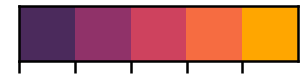

In [5]:
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

custom_colors = ['#4b2a5c','#903269','#ce425e','#f66c41','#ffa600']
customPalette = sns.color_palette(custom_colors)
sns.palplot(sns.color_palette(custom_colors),size=1)

sns.set_context("poster")

cvs dosyalarini pandas ile okuyalarim

In [6]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('../data/book_x/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('../data/book_x/BX_Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('../data/book_x/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

datamiz nasil gorunuyor

In [7]:
users.head(5)

,user_id,location,age
0,User-ID,Location,Age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17


In [8]:
users.describe()

,user_id,location,age
count,278859,278859,168097
unique,278859,57340,166
top,224831,"london, england, united kingdom",24
freq,1,2506,5687


In [9]:
print(f"{y_}{users.dtypes}\n") 

user_id     object
location    object
age         object
dtype: object



In [10]:
items.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [11]:
items.describe()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
count,271380,271380,271379,271380,271378,271380,271380,271380
unique,271380,242155,102029,117,16806,271064,271064,271064
top,1582971439,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/089107290X.0...,http://images.amazon.com/images/P/067172813X.0...,http://images.amazon.com/images/P/006097401X.0...
freq,1,27,632,17628,7536,2,2,2


In [12]:
print(f"{y_}{items.dtypes}\n") 


isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
img_s                  object
img_m                  object
img_l                  object
dtype: object



In [13]:
ratings.head(5)

,user_id,isbn,rating
0,User-ID,ISBN,Book-Rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3


In [14]:
print(f"{y_}{ratings.dtypes}\n") 


user_id    object
isbn       object
rating     object
dtype: object



alttaki blokta sair ne demek istemis anla
bazi indeksleri drop ediyor ama neden ?

In [15]:
users = users.drop(users.index[0])
items = items.drop(items.index[0])
ratings = ratings.drop(ratings.index[0])

veri tiplerini degistirelim ve NaN degerleri atalim

In [16]:
users['age'] = users['age'].astype(float)
users['user_id'] = users['user_id'].astype(int)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)
items['year_of_publication'] = items['year_of_publication'].astype(int)

In [17]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [18]:
users['age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [19]:
users.loc[(users.age>99) | (users.age<5),'age'] = np.nan
users.age = users.age.fillna(users.age.mean())

In [20]:
ratings.isnull().sum() # null degerler silindi

user_id    0
isbn       0
rating     0
dtype: int64

In [21]:
items.isnull().sum() # null degerler silindi

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
img_s                  0
img_m                  0
img_l                  0
dtype: int64

In [22]:
# burada sair ne demek istemektedir ?
# pandas sorgulama yapilarini anlamak lazim
items.loc[items.publisher.isnull(),:] 

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
128897,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129044,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [23]:
# bu kadar ince ayara gerek varmiydi
# boyle degisiklikler gerekteren baska yerlerde varmidir ???
items.loc[items.isbn=='193169656X','publisher']='Mundania Press LLC'
items.loc[items.isbn=='1931696993','publisher']='Novelbooks Incorporated'

In [24]:
items.loc[items.book_author.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
187701,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [25]:
# burada sair ne demek istemektedir ? tam olarak
items.loc[items.isbn=='9627982032','book_author']='Larissa Anne Downe'

In [26]:
# burada sair ne demek istemektedir ?
print(sorted(items['year_of_publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [27]:
items.loc[(items.year_of_publication==0)|(items.year_of_publication>2008) ,'year_of_publication' ] = np.nan
items.year_of_publication = items.year_of_publication.fillna(round(items.year_of_publication.mean()))

data frameleri **User-ID** ve **ISBN** sutunlarini kullanarak birlestirelim
**ama niye ?**

In [28]:
df = pd.merge(users, ratings, on='user_id')
df = pd.merge(df, items, on='isbn')
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [29]:
df.shape

(1031175, 12)

Spitting location column into newer columns

In [30]:
location = df.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

Dropping columns we won't be needing

In [31]:
df = df.drop(['location','img_s','img_m','img_l'], axis = 1)

In [32]:
df.dtypes

user_id                  int64
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication    float64
publisher               object
city                    object
state                   object
country                 object
dtype: object

Rating Distribution  
*Note: This dataset contains both explicit ratings, on a 1–10 scale and implicit actions of unspecified nature. 0 values indicate all interactions without rating values.*

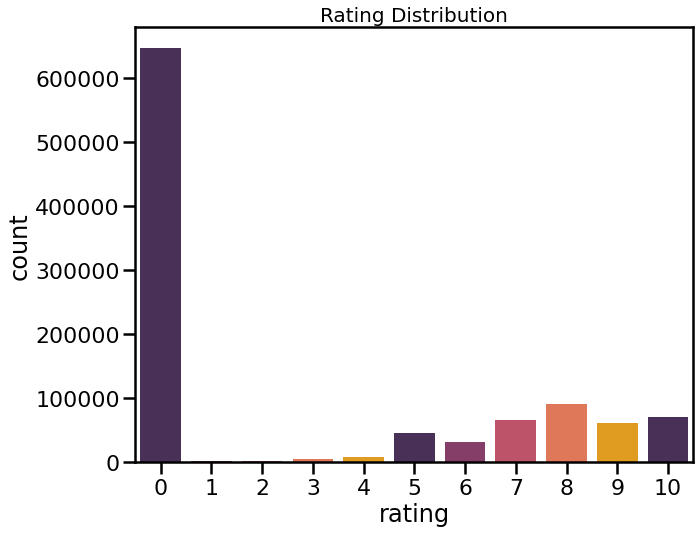

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution',size=20)
plt.show()

In [34]:
df['rating'].value_counts()

0     647323
8      91806
10     71227
7      66404
9      60780
5      45355
6      31689
4       7617
3       5118
2       2375
1       1481
Name: rating, dtype: int64

Explicit Rating Distribution

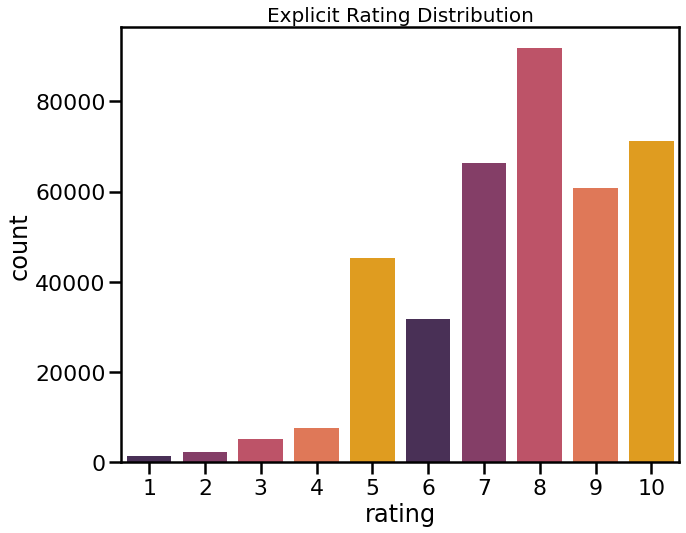

In [35]:
df_v = df[['rating']].copy()
df_v.dtypes
df_v = df_v[df_v.rating != 0]
plt.figure(figsize=(10,8))
sns.countplot(x = 'rating',data = df_v,palette = customPalette)
plt.title('Explicit Rating Distribution',size = 20)
plt.show()

Distribution of age of users

/home/mrk/devel/data_mining/book_recommender/br_venv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


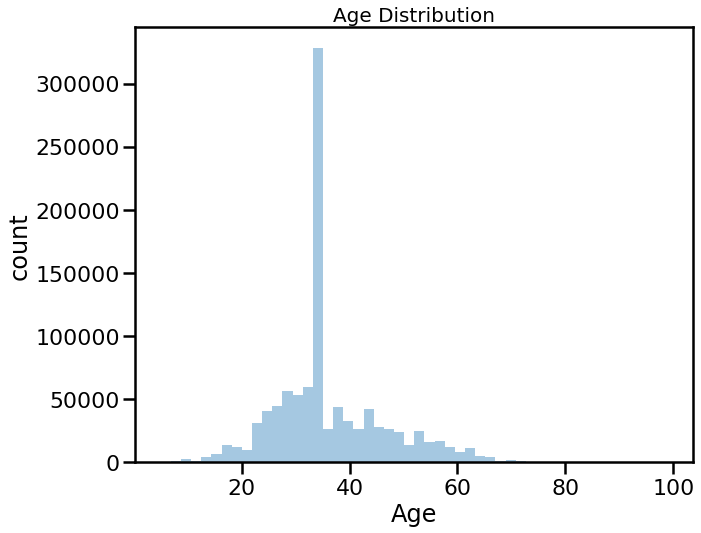

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'],kde=False)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

Top 25 Years of Publication

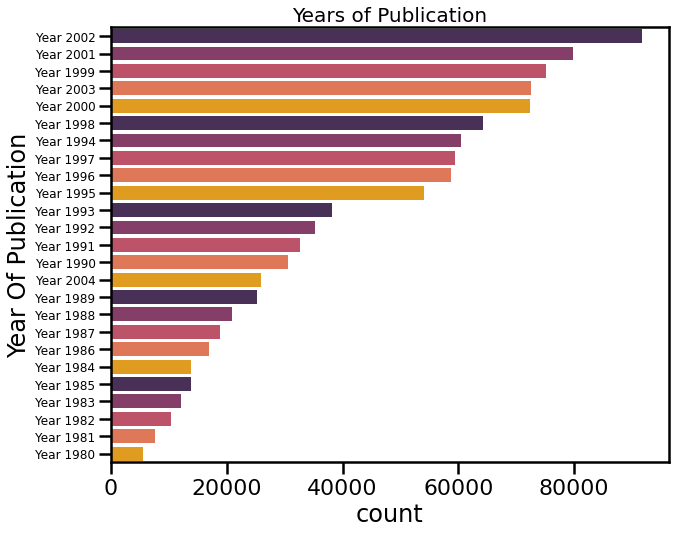

In [37]:
df_v=df[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v,palette=customPalette)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

Top 25 Books

In [38]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v,palette=customPalette)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

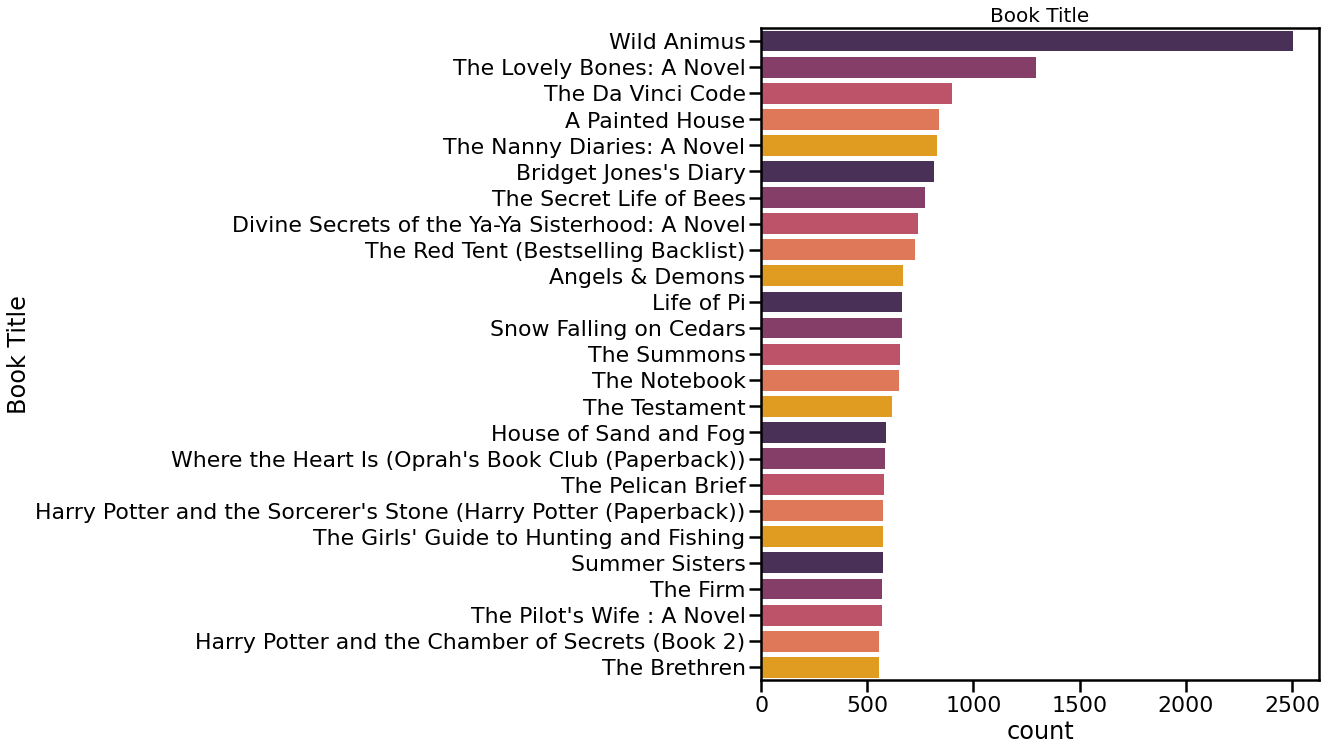

In [39]:
barplot(df,'book_title','Book Title')

Wordcloud of book titles

In [40]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

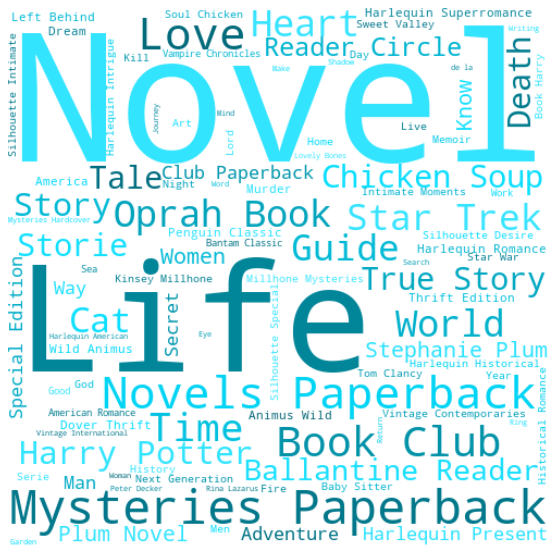

In [41]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df['book_title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()